### keras 内置经典网络的实现

### Xception 使用实例
tf.keras.applications.xception.Xception(include_top=True,weights='imagenet',input_tensor=None,input_shape=None,pooling=None,classes=1000)

该模型只支持channel_last的维度顺序（高度、宽度、通道）
模型默认的输入尺寸是299X299

参数设置：
include_top :是否包含顶层的全连接层
weights:None 代表随机初始化，'imagenet'表示加载在ImagNet上面训练的权值
input_shape :可选，输入尺寸元组，仅当include_top = False时有效
否则输入尺寸必须是（299，299，3） ，预训练模型以这个尺寸训练
必须有三个输入通道。且宽高必须不小于71，例如（150，150，3）是一个合法尺寸

pooling可选 当include_top=False时，该参数指定了特征提取的池化方式
None代表不池化，直接输出最后一层卷积层的输出，是一个4D张量
'avg'：平均池化，相当于在最后一层卷积层后面加上一层全局平均池化层，输出一个2D张量
'max'代表全局最大池化

具体可以查查看：https://keras.io/zh/applications/ keras中文文档
    


In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import glob

In [15]:
print('Tensorflow version:{}'.format(tf.__version__))

Tensorflow version:2.3.0


In [16]:
tf.test.is_gpu_available()

True

In [17]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
keras = tf.keras
layers = tf.keras.layers

In [23]:
train_image_path = glob.glob('./dc_2000/train/*/*.jpg')

In [24]:
len(train_image_path)

2000

In [25]:
train_image_path[-5:]

['./dc_2000/train\\dog\\dog.995.jpg',
 './dc_2000/train\\dog\\dog.996.jpg',
 './dc_2000/train\\dog\\dog.997.jpg',
 './dc_2000/train\\dog\\dog.998.jpg',
 './dc_2000/train\\dog\\dog.999.jpg']

In [26]:
train_image_label = [int(p.split('\\')[1] == 'cat') for p in train_image_path]

In [27]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [28]:
train_image_label[:5]

[1, 1, 1, 1, 1]

In [33]:
def load_preprosess_image(path,label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,[256,256])
    image = tf.cast(image,tf.float32)
    image = image/255
    return image,label

In [34]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path,train_image_label))

In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [36]:
train_image_ds = train_image_ds.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)

In [37]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

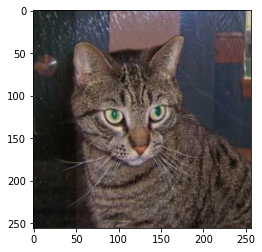

In [40]:
for img,label in train_image_ds.take(2):
    plt.imshow(img)

In [41]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [42]:
train_image_ds = train_image_ds.shuffle(train_count).repeat().batch(BATCH_SIZE)

In [57]:
test_image_path = glob.glob('./dc2000/test/*/*.jpg')
test_image_label = [int(p.split('\\')[1] == 'cat') for p in test_image_path]
test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path,test_image_label))
test_image_ds = test_image_ds.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)
test_image_ds = test_image_ds.repeat().batch(BATCH_SIZE)


TypeError: in user code:

    <ipython-input-33-c6ef0e20620f>:2 load_preprosess_image  *
        image = tf.io.read_file(path)
    C:\4Software\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_io_ops.py:575 read_file  **
        "ReadFile", filename=filename, name=name)
    C:\4Software\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py:493 _apply_op_helper
        (prefix, dtypes.as_dtype(input_arg.type).name))

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


## 模仿train写一下test

In [78]:
test_image_path = glob.glob('./dc_2000/test/*/*.jpg')

In [81]:
test_image_label = [int(p.split('\\')[1] == 'cat') for p in test_image_path]

In [85]:
test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path,test_image_label))

In [86]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [87]:
test_image_ds = test_image_ds.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)

In [88]:
test_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [89]:
test_image_ds = test_image_ds.repeat().batch(BATCH_SIZE)

In [90]:
BATCH_SIZE = 32
test_count = len(test_image_path)
test_count

1000

### keras 内置经典网络实现

In [91]:
covn_base = keras.applications.xception.Xception(weights = 'imagenet',
                                                include_top = False,#不包含全连接层
                                                input_shape=(256,256,3),
                                                pooling='avg')

83689472/83683744 [==============================] - 71s 1us/step


In [92]:
covn_base.trainable = False

In [93]:
covn_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [96]:
model = keras.Sequential()
model.add(covn_base)
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 21,911,081
Trainable params: 1,049,601
Non-trainable params: 20,861,480
_________________________________________________________________


In [100]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0005),
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [101]:
initial_epochs = 5

In [102]:
history = model.fit(train_image_ds,
                   steps_per_epoch=train_count//BATCH_SIZE,
                   epochs=initial_epochs,
                   validation_data = test_image_ds,
                   validation_steps = test_count//BATCH_SIZE)

Epoch 1/5
62/62 [==============================] - 25s 404ms/step - loss: 0.0670 - acc: 0.9738 - val_loss: 0.0233 - val_acc: 0.9899
Epoch 2/5
62/62 [==============================] - 25s 399ms/step - loss: 0.0227 - acc: 0.9899 - val_loss: 0.0228 - val_acc: 0.9899
Epoch 3/5
62/62 [==============================] - 25s 403ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 0.0182 - val_acc: 0.9940
Epoch 4/5
62/62 [==============================] - 25s 407ms/step - loss: 0.0060 - acc: 0.9990 - val_loss: 0.0178 - val_acc: 0.9929
Epoch 5/5
62/62 [==============================] - 25s 409ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0167 - val_acc: 0.9940


In [103]:
covn_base.trainable = True

In [105]:
len(covn_base.layers)

133

In [107]:
fine_tune_at = -33  
#训练后面33个layers,前面的保持不变。就是前面的只是改了全连接层，而下面的代码进行微调，对后面的33层重新训练

In [109]:
for layer in covn_base.layers[:fine_tune_at]:
    layer.trainable = False

In [112]:
model.compile(loss='binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(lr=0.0005/10),
             metrics=['accuracy'])

In [113]:
fine_tune_epochs=5
total_epochs=initial_epochs + fine_tune_epochs

history = model.fit(train_image_ds,
                   steps_per_epoch=train_count//BATCH_SIZE,
                   epochs=total_epochs,
                   initial_epoch = initial_epochs,
                   validation_data = test_image_ds,
                   validation_steps = test_count//BATCH_SIZE)

Epoch 6/10
62/62 [==============================] - 33s 524ms/step - loss: 0.0681 - accuracy: 0.9733 - val_loss: 0.0282 - val_accuracy: 0.9889
Epoch 7/10
62/62 [==============================] - 32s 521ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 0.0198 - val_accuracy: 0.9919
Epoch 8/10
62/62 [==============================] - 33s 536ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0203 - val_accuracy: 0.9909
Epoch 9/10
62/62 [==============================] - 33s 539ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0237 - val_accuracy: 0.9909
Epoch 10/10
62/62 [==============================] - 34s 541ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9929
